# 1. 데이터 수집(Data collect)

Load train,test data using Pandas

In [14]:
import pandas as pd

train_data = pd.read_csv('input/train.csv')
test_data = pd.read_csv('input/test.csv')

# 2. 데이터 분석(Data analysis) 

여기서 NAN는 Not a Number의 약자이며, 이런 데이터들을 전처리(pre processing)하는 과정이 필요합니다.

In [15]:
train_data.head() #최상위 5개의 data를 보여준다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


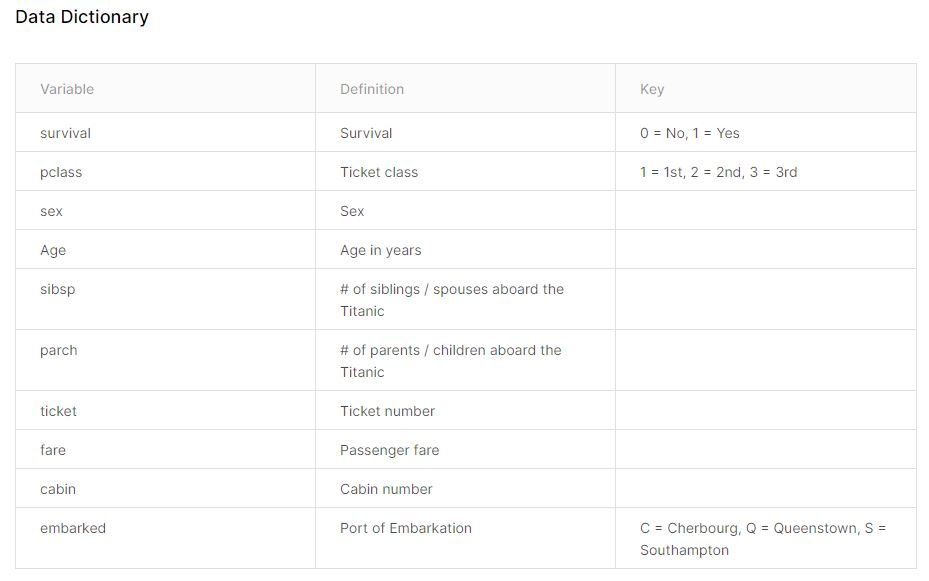

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.shape # 891개의 승객정보와 12개의 특징정보가 있습니다.

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.info() 
# 각 컬럼의 not-null인 정보들을 알 수 있고, 데이터 타입까지 알 수 있습니다.
# 밑에서 보면 Age, Cabin, Embarked  Column이 null인 데이터를 가지고 있다는 것을 알 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info() # Age, Fare, Cabin에 각각 null인 데이터가 있음을 알 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


이런 null인 데이터는 feature engineering을 통해 null이 아닌 값을 줘서 머신러닝에 사용해야 합니다.

# Feature engineering 이란?

machine learning을 통해 신뢰할만한 결과를 얻기 위해서는 적절한 feature들을 선정하는 것.
필요한 feature이지만 없는 경우, 추가해야 합니다. 별로 도움이 안 될 feature는 없애 버려야 합니다. 
많은 feature 중에서 결과에 좋은 영향을 줄 feature만 선정해야 합니다.

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
위와같이 pandas를 이용하면 데이터를 쉽게 분석할 수 있습니다.

# Visulaization using matplotlib or C

Bar Chart for categorical Features

1. Pclass
2. Sex
3. SibSp(# of siblings and spouse)
4. Parch(# of parents and children)
5. Embarked
6. Cabin

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn defalut for plots

함수에 관해 간단히 설명해보겠습니다.
함수 bar_chart의 파라미터로 특징(컬럼)을 하나씩 보내게 되는데,
만약 성별을 보내면 성별에 따라서 죽었는지 살았는지, 또 다른 특징을 보내면 그 특징에 따라 결과를 시각화 시켜주는 함수가 됩니다.

In [7]:
def barChart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

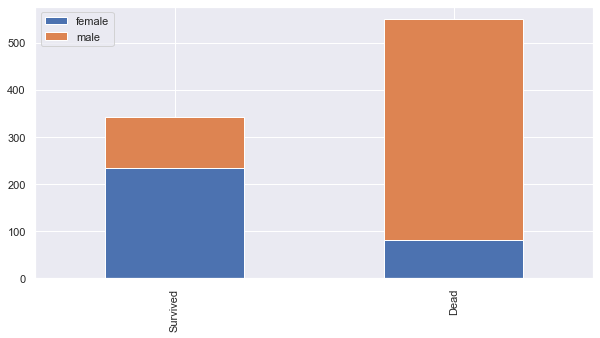

In [8]:
barChart('Sex')

위 차트에서 여자가 남자보다 살아날 확률이 높다는 가설을 세울 수 있습니다.

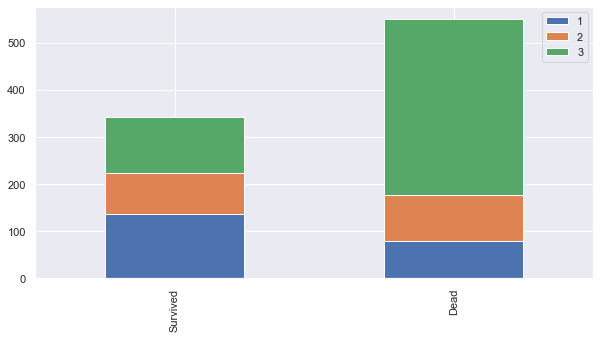

In [10]:
barChart('Pclass')

In [ ]:
퍼스트 클래스 자리는 3rd 클래스 자리보다 살아날 확률이 높은 자리였습니다.!

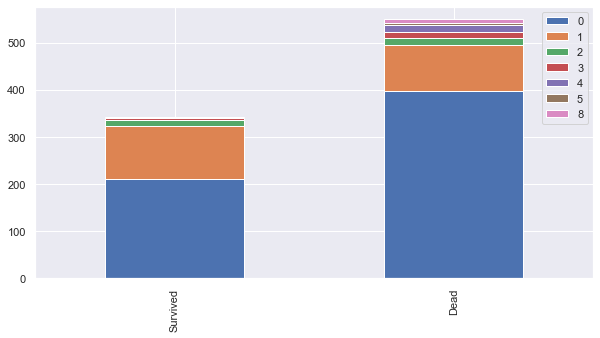

In [11]:
barChart('SibSp')

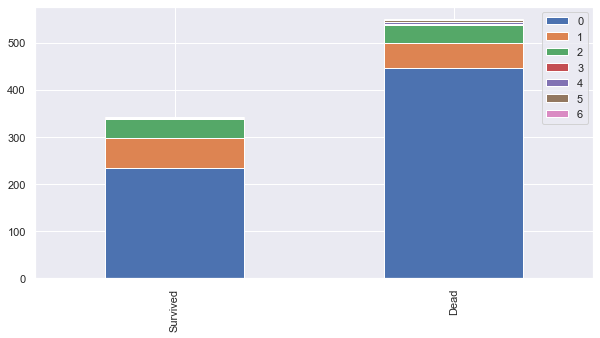

In [12]:
barChart('Parch')

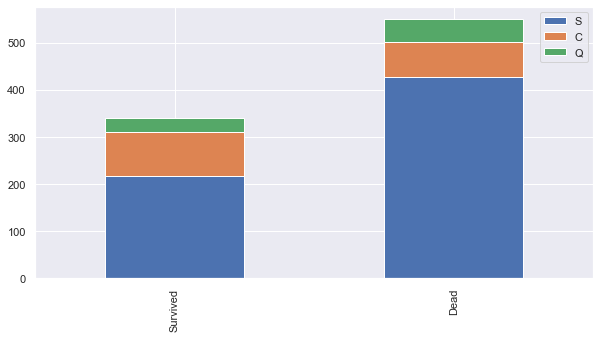

In [13]:
barChart('Embarked')

In [ ]:
뭔가 다 비슷해서 가설을 세우기엔 부족한 데이터입니다.